## Red and White Wine Classification ##

In this project we will use two data sets from Kaggle to predict wether a wine is a white wine or a red wine. <br>
Links to the used datasets: (these are two halfs from the UCI Machine Learning Repository) <br>
Red Wine - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
White Wine - https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Makes it so the figures will show in the notebook.

In [39]:
%matplotlib inline

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [40]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Reading the data into two dataframes. The data is already relatively clean, we will only need to merge the two into one dataframe with an additional 'type' column.

In [42]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

In [43]:
white_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [44]:
red_wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


Lets go over the given parameters so we know what we are working with. <br>
Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

Lets use the Pandas Profile Report for a fast analyses on each data set:

In [45]:
#red_profile = red_wine_data.profile_report(title="Red Wine Report")
#red_profile.to_file(output_file="Red Wine Report.html")

In [46]:
#white_profile = white_wine_data.profile_report(title="White Wine Report")
#white_profile.to_file(output_file="White Wine Report.html")

<b> Lets merge the two </b> <br>
First we will add a 'type' column so we can distinguish between red and white wine when the sets are combined.
We will classify all red wines as type '1' wine, and all white wines as type '0' wine.

In [47]:
red_wine_data['type'] = 1 # 'red'
white_wine_data['type'] = 0 # 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2389,7.7,0.34,0.28,11.0,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6,0
4362,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1,6,0
3436,7.2,0.24,0.29,2.2,0.037,37.0,102.0,0.99200,3.27,0.64,11.0,7,0
2311,8.2,0.27,0.43,1.6,0.035,31.0,128.0,0.99160,3.10,0.50,12.3,6,0
4997,6.1,0.33,0.32,7.8,0.052,52.0,183.0,0.99657,3.39,0.65,9.5,5,0


In [48]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 2389 to 3512
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Now that we combined the data we will try to gain some insight into the correlation between parameters and confirm our own suspicions.

## Correlation ##

In [49]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

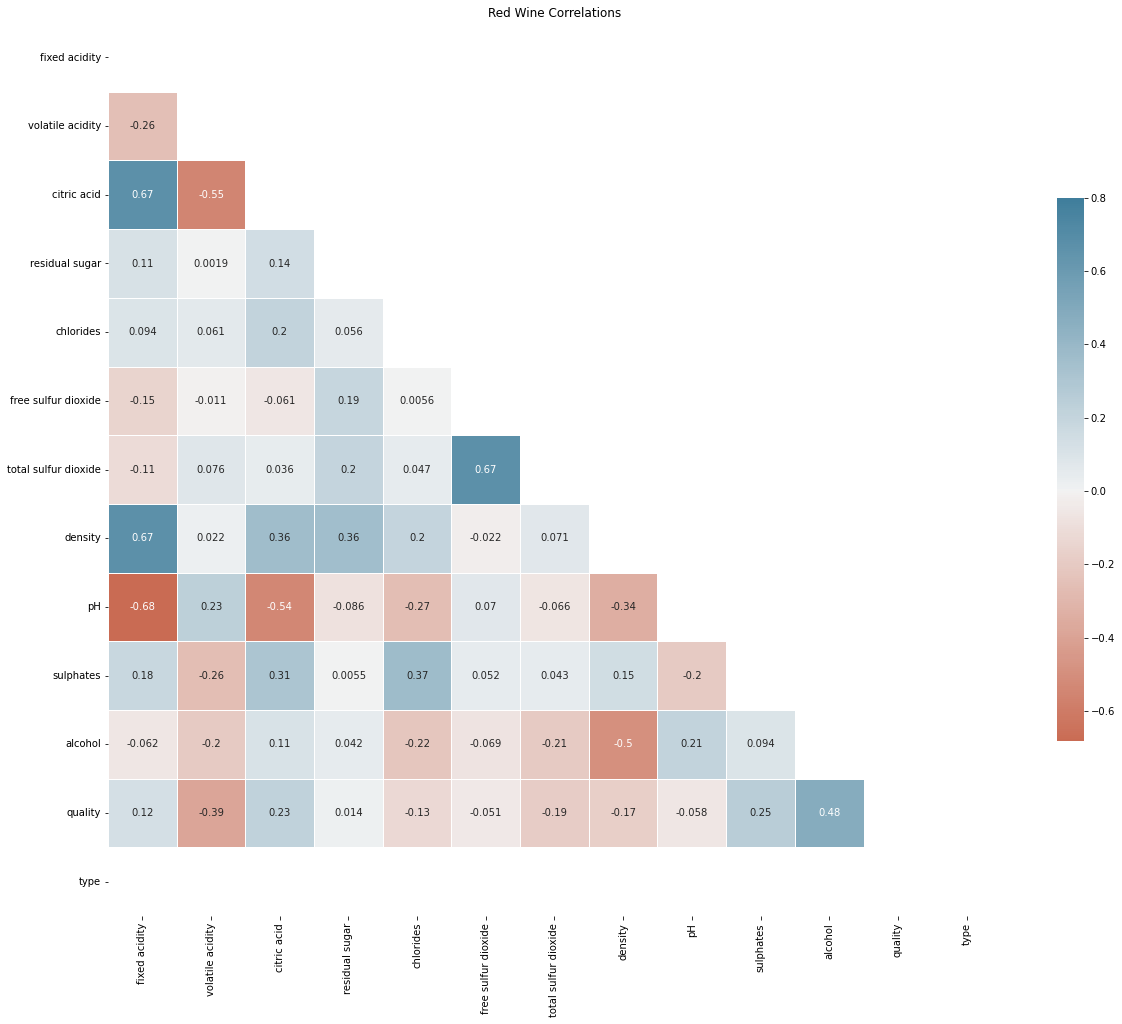

In [50]:
CorrelationTable(red_wine_data, 'Red Wine Correlations')

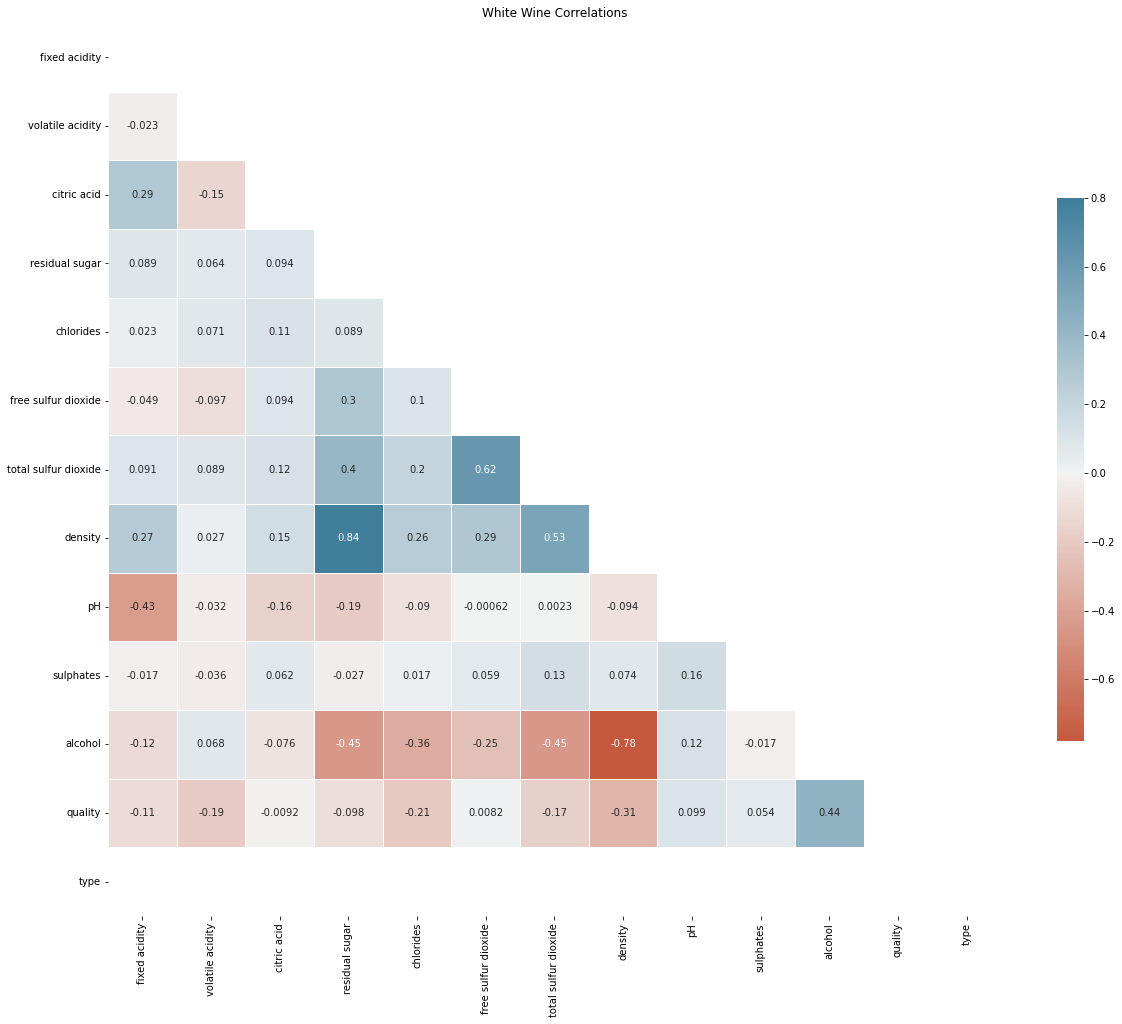

In [51]:
CorrelationTable(white_wine_data, 'White Wine Correlations')

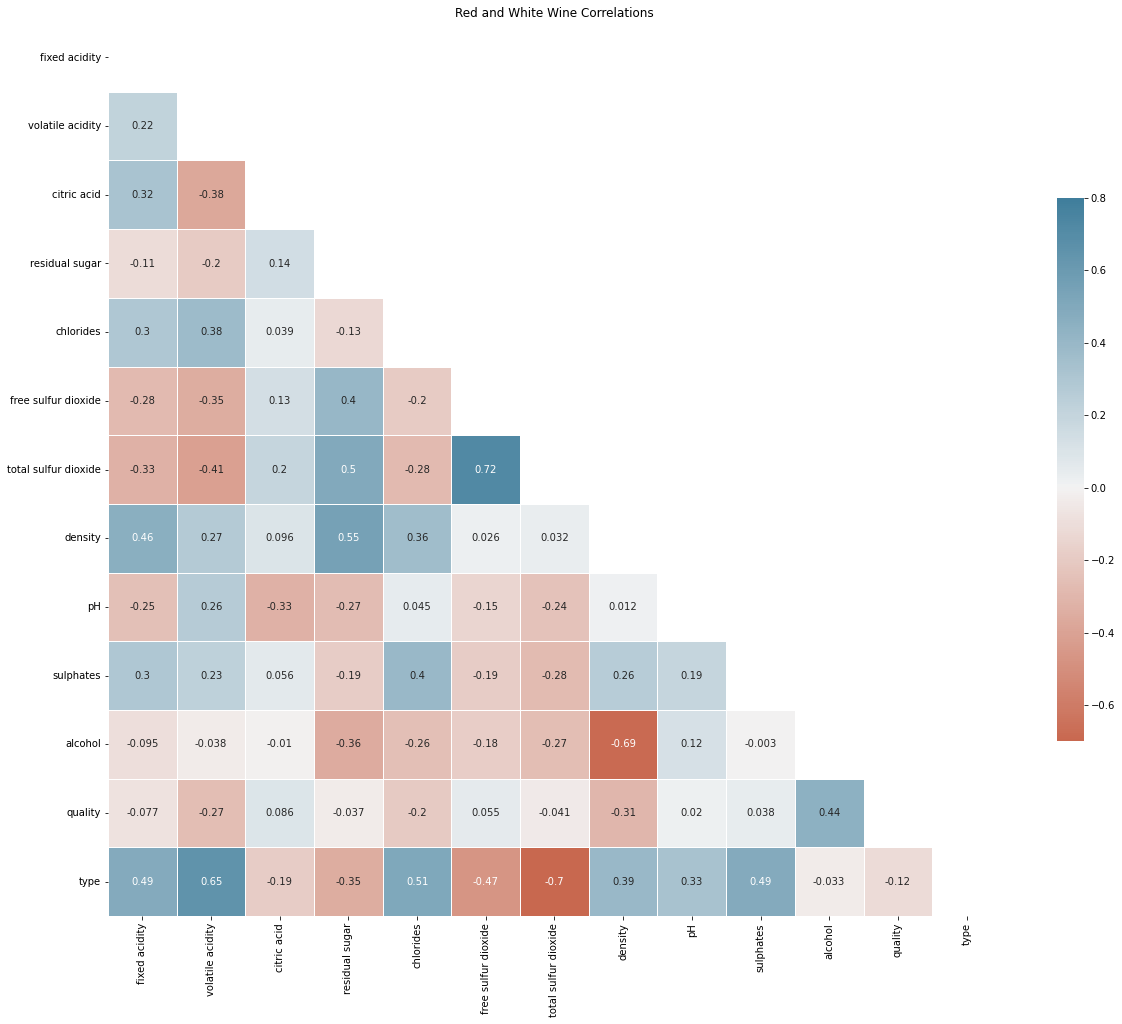

In [52]:
CorrelationTable(wine_data, 'Red and White Wine Correlations')

<b> Important Connections: </b> (greater than 0.4)
Note: There are more connections, but those were the strongest, so we will focus mainly on them.
* Type, Total Sulfur Dioxide: (-0.7) Hence we can expect that a wine with a lower amount of total sulfur dioxide will be type 1, meaning red wine.
* Type, Volatile Acidity : (0.65) We can expect that a wine with higher amount of volatile acidity will be a type 1, meaning red wine.
* Type, chlorides : (0.51) We can expect that a wine with higher amount of Chlorides will be a type 1 , meaning red wine.
* Type, fixed acidity : (0.49) We can expect that a wine with higher amount of fixed acidity will be a type 1 , meaning red wine.
* Type, sulphates : (0.49) We can expect that a wine with higher amount of sulphates will be a type 1 , meaning red wine.
* Type, Free sulfur dioxide : (-0.47) We can expect that a wine with lower amount of fixed acidity will be a type 1 , meaning red wine.

<b> Example for using the data: </b>
We can expect that the following data will classify a wine as a red wine:
* The wine has a relatively high amount of Volatile acidity, Sulphates, Chlorides
* The wine has a relatively low amount of Total sulfur dioxide, as well as free sulfur dioxide

## Graphs ##

We mainly created those graphs in order to visualize the information we inferred above.

Text(0.5, 1.0, 'type against total sulfur dioxide')

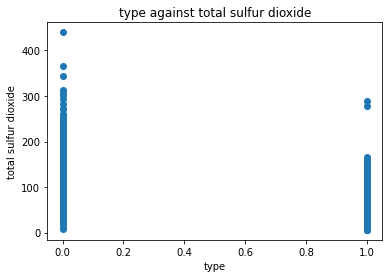

In [53]:
plt.scatter(wine_data['type'], wine_data['total sulfur dioxide'] )
plt.xlabel('type')
plt.ylabel('total sulfur dioxide')
plt.title('type against total sulfur dioxide')

Text(0.5, 1.0, 'type against volatile acidity')

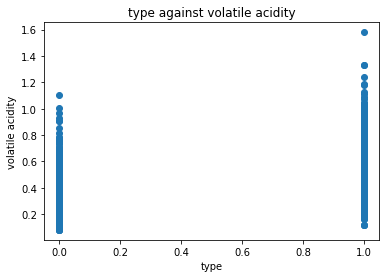

In [54]:
plt.scatter(wine_data['type'], wine_data['volatile acidity'] )
plt.xlabel('type')
plt.ylabel('volatile acidity')
plt.title('type against volatile acidity')

Text(0.5, 1.0, 'type against chlorides')

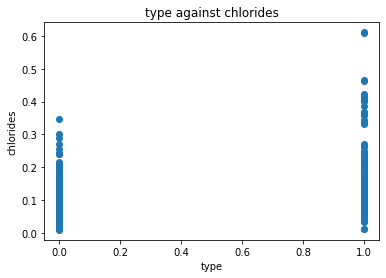

In [55]:
plt.scatter(wine_data['type'], wine_data['chlorides'] )
plt.xlabel('type')
plt.ylabel('chlorides')
plt.title('type against chlorides')


We created this graph because we noticed the difference between red wine correlation and white wine correlation of fixed acidity and density. We wanted to see how our data acts in a visual way. For example, you can infer that a wine with a relatively high amount of fixed acidity will also have a relatively high amount of density when it is a red wine, and an average density when it is a white wine.

Text(0.5, 1.0, 'density against fixed acidity')

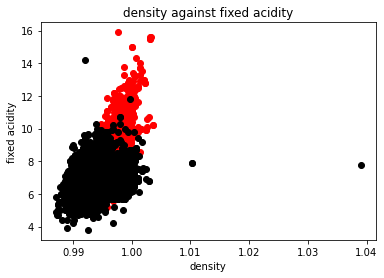

In [56]:
plt.scatter(red_wine_data['density'], red_wine_data['fixed acidity'] , color = 'r')
plt.scatter(white_wine_data['density'], white_wine_data['fixed acidity'] , color = 'k')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.title('density against fixed acidity')

## Models ##

First of all we will split the data into a training set and a final test set.

In [57]:
from sklearn.model_selection import train_test_split

x = wine_data.drop(['type'], axis=1)
y = wine_data['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

We have a know issue of class imbalance in our data set (way more white wine samples). <br>
One of the tactics we will try to challenge the class imbalance with will be over sampling.

In [58]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
x_train_oversampled, y_train_oversampled = over_sampler.fit_resample(x_train, y_train)

### Dummies ###
To be able to truly understand and asses our models’ performance, we would need to establish a baseline for the data that we have. For that we would use a Dummy Model that doesn't try and find patterns in the given data. <br>
Lets run a dummy model to get our baseline:

In [59]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [60]:
dummy_clf = DummyClassifier(strategy="stratified")

score = abs(np.median( cross_val_score(dummy_clf, x_train, y_train, cv=30, scoring='accuracy') ))
print('Dummy\'s Score: {}'.format(score))

Dummy's Score: 0.6237582781456954


### K-Nearest Neighbor ###
K nearest neighbor is a relatively simple algorithm that is built around the concept that similar, or close, data would give similar results. In other words, similar things are near to each other.
The algorithm would search for the K nearest points (in the train sample) on the x axises and predicts that the y value would be a combination of those k point's y value.

We have a problem of data imbalance (way more white wine samples). 
Specifically unbalanced classes are not a big problem for the k-nearest neighbor algorithm. Knn is not influenced in any way by the size of the class, it does not favor a class based on its size. We also run the model through cross validation to prevent edge cases where we get mostly white wine data.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Let us find the consistently best k (except k=1 to avoid overfitting):

In [25]:
k_neighbors_scores = []
k_neighbors_range = range(1, 51)

for k_neighbors in k_neighbors_range:
    knn = KNeighborsClassifier(k_neighbors)
    score = abs(np.median( cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy') ))
    k_neighbors_scores.append(score)

max_k_score = max(k_neighbors_scores[1:])
max_k = k_neighbors_scores.index(max_k_score) + 1
print('Score: {}, Best K: {}'.format(max_k_score, max_k))

Score: 0.940598828484291, Best K: 9


In [26]:
plt.plot(k_neighbors_range, k_neighbors_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Model Accuracy by K Nearest Neighbors')

Text(0.5, 1.0, 'Model Accuracy by K Nearest Neighbors')

Lets check the the model's accuracy using the following metrics:
1. Precision. Proportion of the positive identifications that was actually correct. (precision = TP / TP+FP)
2. Recall. Proportion of the actual positives that was identified correctly. (recall = TP / TP+FN)
3. Confusion Matrix

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(max_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','-1'])
cmd.plot()
plt.title('KNN Confusion Matrix (prediscting if white wine)')

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1469
           1       0.92      0.84      0.88       481

    accuracy                           0.94      1950
   macro avg       0.94      0.91      0.92      1950
weighted avg       0.94      0.94      0.94      1950



Text(0.5, 1.0, 'KNN Confusion Matrix (prediscting if white wine)')

### Random Forest Regressor ###
A random forest is a meta estimator that fits a number of classifying decision trees on various random sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

We have a known problem of class imbalance. But first we will try and run the model as is. 

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier(n_estimators=100)
raw_score = abs( np.median( cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy') ))

print('Score: {}'.format(raw_score))

Score: 0.9955995546303916


We will use RandomForestClassifier's 'class_weight' feature:

In [30]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
class_score = abs( np.median( cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy') ))

print('Score: {}'.format(class_score))

Score: 0.9945006535314905


And finally we will try to over sample the data.

In [31]:
clf = RandomForestClassifier(n_estimators=100)
over_score = abs( np.median( cross_val_score(clf, x_train_oversampled, y_train_oversampled, cv=10, scoring='accuracy') ))

print('Score: {}'.format(over_score))

Score: 0.9985422740524781


We can conclude that over sampling is the most successful version of this model.

Lets check the the model's accuracy using the following metrics:
1. Precision. Proportion of the positive identifications that was actually correct. (precision = TP / TP+FP)
2. Recall. Proportion of the actual positives that was identified correctly. (recall = TP / TP+FN)
3. Confusion Matrix

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

random_forest = RandomForestClassifier(max_k)
random_forest.fit(x_train_oversampled, y_train_oversampled)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','-1'])
cmd.plot()
plt.title('Random Forest Confusion Matrix (prediscting if white wine)')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1469
           1       0.98      0.99      0.99       481

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



Text(0.5, 1.0, 'Random Forest Confusion Matrix (prediscting if white wine)')

### Logistic Regression ###
Logistic Regression is based on Linear Regression assigning thresholds to separate the different classes. <br>
Linear Regression is a linear model, meaning it assumes that y can be calculated from a linear combination of the input variables, x, and tries to calculate that very combination.

We have a known problem of class imbalance. But first we will try and run the model as is. 

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(solver='lbfgs', max_iter=10000) # lbfgs is the default algorithm
raw_score = abs( np.median( cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy') ))

print('Score: {}'.format(raw_score))

Score: 0.9845984412063707


Once again we will try to use LogisticRegression's 'class_weight' feature: <br>
Which will use a slightly altered algorithm fit for unbalanced use cases.

In [35]:
clf = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced') # lbfgs is the default algorithm
class_score = abs( np.median( cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy') ))

print('Score: {}'.format(class_score))

Score: 0.9846008616933727


And finally we will try to over sample the data.

In [36]:
clf = LogisticRegression(solver='lbfgs', max_iter=10000)
over_score = abs( np.median( cross_val_score(clf, x_train_oversampled, y_train_oversampled, cv=10, scoring='accuracy') ))

print('Score: {}'.format(over_score))

Score: 0.9854227405247813


We saw that Logistic Regression dealt with the untouched data best in this particular run, as we actually got samples from both red and white wine. <br>
However, because it is random there might be a run where it will only get samples from white wine/red wine which will create an inaccurate prediction. <br>
Thats why we will go with the over sampling for this model too.

Lets check the the model's accuracy using the following metrics:
1. Precision. Proportion of the positive identifications that was actually correct. (precision = TP / TP+FP)
2. Recall. Proportion of the actual positives that was identified correctly. (recall = TP / TP+FN)
3. Confusion Matrix

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logistic_regressor = LogisticRegression(solver='lbfgs', max_iter=10000) # lbfgs is the default algorithm
logistic_regressor.fit(x_train_oversampled, y_train_oversampled)
y_pred = logistic_regressor.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','-1'])
cmd.plot()
plt.title('Logistic Regression Confusion Matrix (prediscting if white wine)')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1469
           1       0.94      0.99      0.96       481

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.97      1950
weighted avg       0.98      0.98      0.98      1950



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix (prediscting if white wine)')

### Choosing Our Model ###

Random Forest is our best performing model overall with an accuracy score that surpasses 99% and phenomenal precision and recall. <br>
Lets run an error module on it, Lets make an ROC curve!

In [38]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
import matplotlib.pyplot as plt

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(x_train_oversampled, y_train_oversampled)

probs = clf.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Daniel\AppData\Local\Temp/ipykernel_15644/2704097586.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


We can see that the curve starts at 0.9~ and only goes up, approaching 1.

## Conclusions ##
 - We learned to deal with unbalanced classing in data sets in multiple ways.
 - Leading our final model (Random Forest) reached an accuracy score of 99%!
 - This level of accuracy was found in all our models, along with the strong correlation we saw, making us believe there are distinct characteristics to white and red wine.
